In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [7]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [15]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=12)
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 6)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='white', alpha=1, ecolor='blue', capsize=12, width=2, edgecolor='blue')
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='white',alpha=1, ecolor='red', capsize=12, width=2, edgecolor='red')
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    #ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [16]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 10.028371159161704 p-value: 5.732402812566959e-10
animal :
t-statistic: 8.921591234706371 p-value: 4.612597260081845e-09
person :
t-statistic: 6.494452564337467 p-value: 7.803918059785429e-07
furniture :
t-statistic: 3.8996021017180524 p-value: 0.00038509835649154164
vehicle :
t-statistic: 10.659535558551434 p-value: 1.8648505818073506e-10
sport :
t-statistic: 7.226711687858799 p-value: 1.528745716068599e-07
food :
t-statistic: 2.3202456232686326 p-value: 0.014997261750562313
outdoor :
t-statistic: 1.8701541562482715 p-value: 0.03741388294467839
Bonferroni:

Reject: [ True  True  True  True  True  True False False]
pvals corrected: [4.58592225e-09 3.69007781e-08 6.24313445e-06 3.08078685e-03
 1.49188047e-09 1.22299657e-06 1.19978094e-01 2.99311064e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [2.29296113e-09 1.23002594e-08 1.24862689e-06 5.13464475e-04
 1.49188047e-09 3.05749143e-07 1.71397277e-02 3.74138829e-02

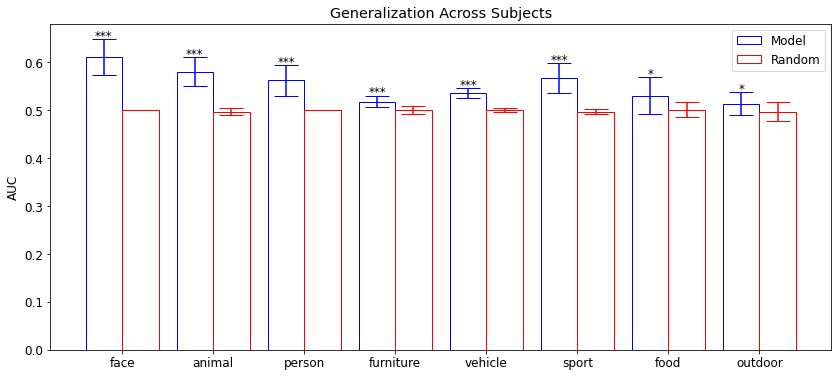

In [17]:
'''
person = [0.62, 0.61, 0.58] + [0.58, 0.61, 0.57] + [0.55, 0.58, 0.54] + [0.61, 0.59, 0.6]
person_rand = [0.49, 0.49, 0.49] + [0.5, 0.5, 0.5] + [0.51, 0.5, 0.5] + [0.52, 0.5, 0.51]
face = [0.62, 0.62, 0.67] + [0.59, 0.61, 0.56] + [0.58, 0.68, 0.56] + [0.53, 0.53, 0.53]
face_rand = [0.51, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.52, 0.52, 0.54]
vehicle = [0.53, 0.54, 0.56] + [0.53, 0.57, 0.54] + [0.55, 0.55, 0.54] + [0.52, 0.5, 0.49]
vehicle_rand = [0.5, 0.5, 0.52] + [0.51, 0.5, 0.49] + [0.51, 0.47, 0.49] + [0.48, 0.5, 0.51]
outdoor = [0.57, 0.57, 0.61] + [0.55, 0.56, 0.48] + [0.52, 0.52, 0.51] + [0.53, 0.52, 0.53]
outdoor_rand = [0.48, 0.48, 0.54] + [0.5, 0.5, 0.5] + [0.49, 0.5, 0.49] + [0.47, 0.5, 0.47]
animal = [0.55, 0.6, 0.55] + [0.55, 0.55, 0.56] + [0.61, 0.57, 0.55] + [0.53, 0.5, 0.51]
animal_rand = [0.5, 0.5, 0.5] + [0.51, 0.49, 0.49] + [0.5, 0.48, 0.51] + [0.52, 0.5, 0.51]
sport = [0.54, 0.55, 0.57] + [0.56, 0.57, 0.58] + [0.55, 0.56, 0.57] + [0.54, 0.53, 0.54]
sport_rand = [0.5, 0.51, 0.5] + [0.5, 0.5, 0.49] + [0.49, 0.49, 0.5] + [0.48, 0.51, 0.51]
food = [0.55, 0.56, 0.53] + [0.56, 0.52, 0.56] + [0.53, 0.51, 0.52] + [0.51, 0.52, 0.5]
food_rand = [0.51, 0.5, 0.48] + [0.48, 0.51, 0.52] + [0.48, 0.48, 0.49] + [0.53, 0.51, 0.52]
furniture = [0.53, 0.57, 0.57] + [0.54, 0.57, 0.51] + [0.5, 0.5, 0.49] + [0.57, 0.52, 0.53]
furniture_rand = [0.5, 0.48, 0.51] + [0.46, 0.49, 0.49] + [0.51, 0.5, 0.49] + [0.5, 0.51, 0.5]
tool = [0.52, 0.52, 0.49] + [0.53, 0.51, 0.49] + [0.49, 0.5, 0.54] + [0.52, 0.51, 0.5]
tool_rand = [0.52, 0.49, 0.53] + [0.5, 0.49, 0.49] + [0.49, 0.5, 0.48] + [0.51, 0.49, 0.5]
'''
person = [0.59, 0.62, 0.55] + [0.52, 0.58, 0.55] + [0.62, 0.56, 0.55] + [0.53, 0.53, 0.55]
person_rand = [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5]
face = [0.67, 0.58, 0.62] + [0.55, 0.67, 0.58] + [0.64, 0.61, 0.65] + [0.59, 0.59, 0.59]
face_rand = [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5]
vehicle = [0.54, 0.53, 0.53] +  [0.54, 0.54, 0.53] + [0.53, 0.52, 0.53] + [0.55, 0.56, 0.53]
vehicle_rand = [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.49, 0.51, 0.5]
outdoor = [0.52, 0.54, 0.55] + [0.51, 0.51, 0.53] + [0.54, 0.5, 0.46] + [0.49, 0.52, 0.5]
outdoor_rand = [0.47, 0.51, 0.47] + [0.49, 0.49, 0.5] + [0.51, 0.5, 0.5] + [0.47, 0.51, 0.54]
animal = [0.62, 0.61, 0.62] + [0.62, 0.59, 0.58] + [0.57, 0.55, 0.55] + [0.58, 0.54, 0.54]
animal_rand = [0.5, 0.5, 0.5] + [0.48, 0.49, 0.51] + [0.5, 0.5, 0.5] + [0.49, 0.5, 0.5]
sport = [0.59, 0.63, 0.58] + [0.56, 0.57, 0.55] + [0.55, 0.61, 0.56] + [0.53, 0.51, 0.56]
sport_rand = [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.49, 0.5, 0.5] + [0.49, 0.49, 0.5]
food = [0.57, 0.56, 0.6] + [0.54, 0.58, 0.5] + [0.5, 0.5, 0.49] + [0.47, 0.52, 0.54]
food_rand = [0.5, 0.5, 0.5] + [0.49, 0.5, 0.5] + [0.5, 0.53, 0.5] + [0.47, 0.5, 0.53]
furniture = [0.53, 0.52, 0.52] + [0.53, 0.54, 0.5] + [0.51, 0.53, 0.5] + [0.52, 0.51, 0.51]
furniture_rand = [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.52, 0.5, 0.51] + [0.48, 0.5, 0.5]
#tool = [0.52, 0.49, 0.51] + [0.51, 0.51, 0.51] + [0.47, 0.52, 0.52] + [0.48, 0.51, 0.48]
#tool_rand = [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5] + [0.49, 0.49, 0.49]

names =['face', 'animal', 'person', 'furniture', 'vehicle', 'sport', 'food', 'outdoor'] 
sub = [face, animal, person, furniture, vehicle, sport, food, outdoor]
sub_rand = [face_rand, animal_rand, person_rand, furniture_rand, vehicle_rand, sport_rand, food_rand,outdoor_rand]

categories, categories_rand = sub, sub_rand
#categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
t_stat = stats.ttest_ind(sub[0], sub_rand[0]).statistic
pval = stats.ttest_ind(sub[0], sub_rand[0]).pvalue / 2
print("p-value:", pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Generalization Across Subjects', 'upper right')


In [18]:
def build_subplot(categories, categories_rand, x_pos, names, title, leg_loc):
    plt.rc('font', size=16)
    fig, ax = plt.subplots(4,3)
    fig.set_size_inches(40, 30)
    for i in range(4):
        for j in range(3):
            k = i*3+j
            CTEs, CTEs_rand, error, error_rand, x_pos = process(categories[:,k:k+1], categories_rand[:,k:k+1], names)
            plt.yticks(np.arange(0, 1, 0.1))
            ax[i,j].bar(x_pos, CTEs, align='center', color='blue', alpha=0.8, ecolor='black', capsize=2, width=2)
            ax[i,j].bar(x_pos+2, CTEs_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=2, width=2)
            ax[i,j].set_ylabel('AUC')
            ax[i,j].set_xticks(x_pos+1)
            ax[i,j].set_xticklabels(names)
            #ax[i,j].set_title(title)  
            ax[i,j].yaxis.grid(True)
            #ax[i,j].legend(['Model', 'Random'], loc=leg_loc)
            ax[i,j].patches
    plt.show()
    return

In [ ]:
categories, categories_rand = np.array(sub), np.array(sub_rand)
#categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
build_subplot(categories, categories_rand, x_pos, names,
           'Generalization Across Subjects', 'upper right')